In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tk
print("tensorflow v.", tf.__version__, ";  keras v.",tf.keras.__version__)



tensorflow v. 1.13.1 ;  keras v. 2.2.4-tf



x1_train: [[2.0, 1.0], [4.0, 1.5], [3.0, 1.0], [3.5, 0.5], [2.0, 0.5], [5.5, 1.0], [1.0, 1.0]] 
y_train: [[0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0]] 
x1_test: [4.5, 1.0]


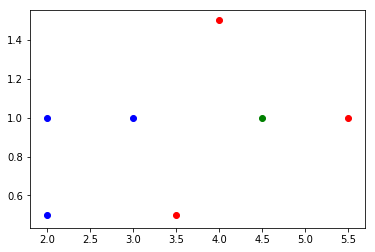

In [2]:
#define data

#known flower length and width measurements
#x_train[flower#][l,w]
x_train = [
        [2.0,1.0],
        [4.0,1.5],
        [3.0,1.0],
        [3.5,0.5],
        [2.0,0.5],
        [5.5,1.0],
        [1.0,1.0]]

#known flower types (blue = 0; red  = 1)
#y_train[flower#][type]
y_train = [
        [0.0],
        [1.0],
        [0.0],
        [1.0],
        [0.0],
        [1.0],
        [0.0]]

#flower with unknown color
#x_test[l, w]
x_test = [4.5,1.0]   

#verify
print ("\r\nx1_train:", x_train, 
       "\r\ny_train:",y_train,
       "\r\nx1_test:",x_test)


#verify
#scatter plot of data
for i in range(len(x_train)-1):
    color = 'r'
    if y_train[i][0] == 0.0: color = 'b'
    plt.scatter(x_train[i][0], x_train[i][1], c=color)
    
#mystery flower
plt.scatter(x_test[0], x_test[1], c='g')

In [3]:
#normalize / scale data (from [0,255] to [0,1])
x_train = tk.utils.normalize(x_train)
y_train = tk.utils.normalize(y_train)
x_test = tk.utils.normalize(x_test)
y_test = tf.placeholder(tf.float32, shape=tf.TensorShape([1]))

#verify
print ("\r\nx_train:", x_train, 
       "\r\ny_train:",y_train,
       "\r\nx_test:",x_test)



x_train: [[0.89442719 0.4472136 ]
 [0.93632918 0.35112344]
 [0.9486833  0.31622777]
 [0.98994949 0.14142136]
 [0.9701425  0.24253563]
 [0.98386991 0.17888544]
 [0.70710678 0.70710678]] 
y_train: [[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]] 
x_test: [[0.97618706 0.21693046]]


In [4]:
#build model

#sequential (feed forward type)
model = tk.models.Sequential()

#add Dense layer with
    #input tensor of size [2] (coresponding to (l,y))
    #sigmoid as the activation function
    #output tensor size of one dimension (prediction)
    #labled "lyr_sig" (arbitrary for identification)
model.add(tk.layers.Dense(1, activation='sigmoid', input_shape=(2,), name="lyr_sig"))



#Creates model with 
    #adam optimizer (good default solver)
    #loss function
    #metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#verify
model.summary()
print(model.variables)


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lyr_sig (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[<tf.Variable 'lyr_sig/kernel:0' shape=(2, 1) dtype=float32>, <tf.Variable 'lyr_sig/bias:0' shape=(1,) dtype=float32>]


In [5]:
#train neural network, defining
    #x valiable populated from x_train
    #y variable populated from y_train
    #number of macro iterations (epochs)
    #number of micro interations (steps per epoch)
model.fit(x=x_train, y=y_train, epochs=5, steps_per_epoch=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6155 - acc: 0.6893
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5728 - acc: 0.8321
Epoch 3/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5438 - acc: 0.7143
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5220 - acc: 0.7143
Epoch 5/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5051 - acc: 0.7143


In [6]:
#get the model's prediction of the mystery flower
prediction = model.predict(x_test)
print(prediction)

[[0.58811915]]


In [7]:
#save model (in current directory)
model.save('tk-flowers-example')

In [8]:
#load model (from current directory)
flower_model = tk.models.load_model('tk-flowers-example')

In [9]:
#function to interpret predictions
#define a treshold for determining plant type; here it is set to 0.5
def interpret(nnprediction):
    if nnprediction >= 0.5: 
        return 'red'
    else:
        return 'blue' 

#get interpretation of the model's mystery flower prediction
pred01 = flower_model.predict([x_test])
print("Myster Flower predicted to be :", interpret(pred01))

#get interpretations of the model's prediction of all known flowers
for f in range(0, len(x_train)-1) :
    predf = flower_model.predict([x_train])
    print( x_train[f], predf[f], y_train[f], interpret(predf[f]) )
    
#this is where the error of my model is apparent. it does not correctly predict the types of known flowers

Myster Flower predicted to be : red
[0.89442719 0.4472136 ] [0.25149763] [0.] blue
[0.93632918 0.35112344] [0.38482347] [1.] blue
[0.9486833  0.31622777] [0.43783322] [0.] blue
[0.98994949 0.14142136] [0.69014347] [1.] red
[0.9701425  0.24253563] [0.55039936] [0.] red
[0.98386991 0.17888544] [0.64150786] [1.] red
